In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\old_dataset.csv"

data = pd.read_csv(data_dir)

col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

target_per_class = 50

import numpy as np
import pandas as pd

augmented_data = []

numeric_cols = ['rainfall (mm)', 'temperature(avg)', 'humidity(avg)','sunlight(hour)', 'direction of wind(deg)', 'velocity of wind(km/h)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.1)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data)

data = pd.concat([data, augmented_df], ignore_index=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data['zone_encoded'] = label_encoder.fit_transform(data['Agricultural zone'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

cols = ['label','Agricultural zone']
data.drop(columns=cols, axis=1, inplace=True)

data.info()


{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd': 39, 'robi pumpkin Cucurbita': 40}
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}
<class 'pandas.core.frame.DataF

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


mask_t = (X>=-2) & (X<=2)
X = X[mask_t.all(axis=1)]
y = y[mask_t.all(axis=1)]

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_t

array([[ 0.79502075,  0.73876134,  0.93868265, ...,  0.57198788,
        -0.11257522, -0.81626331],
       [-0.74536522,  1.17536594,  0.29621561, ..., -0.00695083,
         0.34419234,  1.73455953],
       [ 0.92338624,  0.38702873,  0.67827573, ...,  0.26278872,
        -0.28214351, -0.56118102],
       ...,
       [ 0.79502075,  0.4338792 ,  0.79657027, ...,  1.06831434,
        -0.1558436 , -0.81626331],
       [ 1.18011724, -0.85633538, -0.53437232, ..., -0.00640794,
        -0.22646485,  0.71423039],
       [ 0.21737601,  1.68339786,  1.00883697, ..., -0.93491686,
         0.00599085, -0.56118102]])

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [4]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

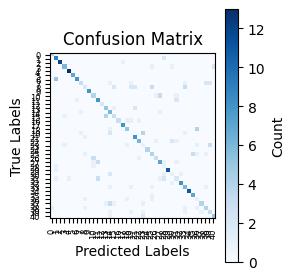

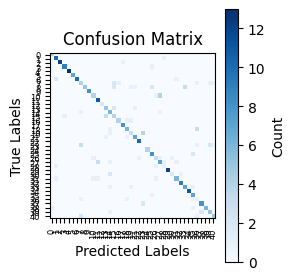

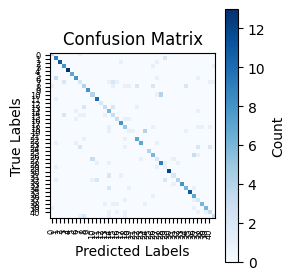

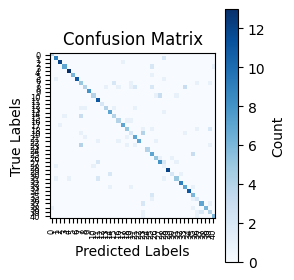

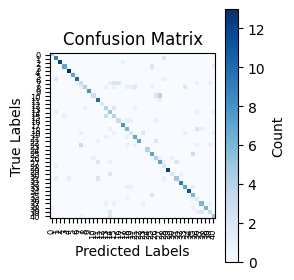

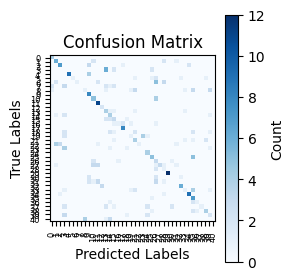

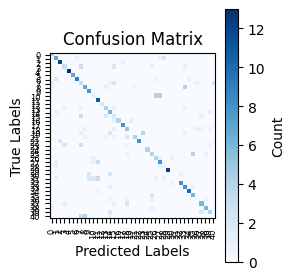

Learning rate set to 0.080458
0:	learn: 3.5760415	total: 203ms	remaining: 3m 22s
1:	learn: 3.4515604	total: 271ms	remaining: 2m 15s
2:	learn: 3.3309825	total: 325ms	remaining: 1m 48s
3:	learn: 3.2143441	total: 381ms	remaining: 1m 34s
4:	learn: 3.1207745	total: 457ms	remaining: 1m 30s
5:	learn: 3.0188051	total: 508ms	remaining: 1m 24s
6:	learn: 2.9358771	total: 560ms	remaining: 1m 19s
7:	learn: 2.8604548	total: 613ms	remaining: 1m 15s
8:	learn: 2.7923313	total: 659ms	remaining: 1m 12s
9:	learn: 2.7294539	total: 706ms	remaining: 1m 9s
10:	learn: 2.6746640	total: 754ms	remaining: 1m 7s
11:	learn: 2.6091322	total: 803ms	remaining: 1m 6s
12:	learn: 2.5467094	total: 851ms	remaining: 1m 4s
13:	learn: 2.4931541	total: 899ms	remaining: 1m 3s
14:	learn: 2.4432342	total: 947ms	remaining: 1m 2s
15:	learn: 2.4003476	total: 997ms	remaining: 1m 1s
16:	learn: 2.3551504	total: 1.04s	remaining: 1m
17:	learn: 2.3056896	total: 1.09s	remaining: 59.7s
18:	learn: 2.2650206	total: 1.14s	remaining: 59.1s
19:	l

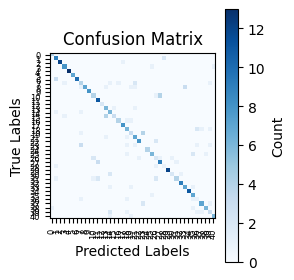

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 1387, number of used features: 8
[LightGBM] [Info] Start training from score -4.239166
[LightGBM] [Info] Start training from score -3.679550
[LightGBM] [Info] Start training from score -3.623981
[LightGBM] [Info] Start training from score -3.708538
[LightGBM] [Info] Start training from score -3.623981
[LightGBM] [Info] Start training from score -3.521326
[LightGBM] [Info] Start training from score -3.867603
[LightGBM] [Info] Start training from score -3.546019
[LightGBM] [Info] Start training from score -3.651379
[LightGBM] [Info] Start training from score -3.497229
[LightGBM] [Info] Start training from score -3.708538
[LightGBM] [Info] Start training from score -3.651379
[LightGBM] [Info] Start training from score -4.239166
[LightGBM] 

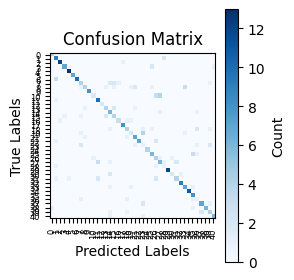

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,XGBoost,SVC,KNN,CatBoost,LightGBM
Accuracy,0.613833,0.731988,0.645533,0.706052,0.680115,0.403458,0.602305,0.711816,0.680115
Precision,0.613833,0.731988,0.645533,0.706052,0.680115,0.403458,0.602305,0.711816,0.680115
Recall,0.613833,0.731988,0.645533,0.706052,0.680115,0.403458,0.602305,0.711816,0.680115
F1 Score,0.613833,0.731988,0.645533,0.706052,0.680115,0.403458,0.602305,0.711816,0.680115


In [5]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_t, y_t, X_val, y_val)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data

In [6]:
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_t, y_t)

importances = model.feature_importances_
features = X_t.columns

plt.barh(features, importances)
plt.title("Feature Importances")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'